In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width: 98%!important}</style>"))

In [2]:
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [3]:
scanners = [
    'C400A2E19293', # R1824
    'CD4533FFC0E1', # R1836
    'D2B6503554D7', # R1826
    'DB8B36A69C56', # R1840
    'DD697EA75B68', # R1835
    'DF231643E227', # R1830
    'E13B805C6CB0', # R1825
    'E43355CA8B96', # R1833
    'E6D9D20DD197', # R1831
    'E8FD0B453DC4', # R1837
    'E96AF2C858BA', # R1827
    'EC72840D9AD3', # R1823
    'F1307ECB3B90', # R1834
    'F1EDAF28E08A', # R1821
    'F69A86823B96', # R1828
    'FB2EE01C18CE', # R1829
    'FDAE5980F28C'  # R1832
]

In [4]:
rawData = pd.read_csv("../Data/rssi3.csv")
rawData.drop("name", axis=1, inplace=True)

In [5]:
rawData

,time,beacon,location,rssi,scanner
0,1575248732956000000,0117C55D14E4,V1_32,-96,E43355CA8B96
1,1575248732976000000,0117C55D14E4,V1_32,-82,F1307ECB3B90
2,1575248733015000000,0117C55D14E4,V1_32,-72,E6D9D20DD197
3,1575248733034000000,0117C55D14E4,V1_32,-79,F1307ECB3B90
4,1575248733096000000,0117C55D14E4,V1_32,-68,FB2EE01C18CE
...,...,...,...,...,...
26542,1575362605486000000,0117C55D14E4,V1_31,-74,FB2EE01C18CE
26543,1575362605549000000,0117C55D14E4,V1_31,-79,E6D9D20DD197
26544,1575362605552000000,0117C55D14E4,V1_31,-85,EC72840D9AD3
26545,1575362605554000000,0117C55D14E4,V1_31,-71,E6D9D20DD197


In [6]:
B1 = rawData[rawData["beacon"] == "0117C55D14E4"]
B1

,time,beacon,location,rssi,scanner
0,1575248732956000000,0117C55D14E4,V1_32,-96,E43355CA8B96
1,1575248732976000000,0117C55D14E4,V1_32,-82,F1307ECB3B90
2,1575248733015000000,0117C55D14E4,V1_32,-72,E6D9D20DD197
3,1575248733034000000,0117C55D14E4,V1_32,-79,F1307ECB3B90
4,1575248733096000000,0117C55D14E4,V1_32,-68,FB2EE01C18CE
...,...,...,...,...,...
26542,1575362605486000000,0117C55D14E4,V1_31,-74,FB2EE01C18CE
26543,1575362605549000000,0117C55D14E4,V1_31,-79,E6D9D20DD197
26544,1575362605552000000,0117C55D14E4,V1_31,-85,EC72840D9AD3
26545,1575362605554000000,0117C55D14E4,V1_31,-71,E6D9D20DD197


In [7]:
B1 = B1.pivot_table(columns="scanner", values="rssi", index=["time", "location"]).rename_axis(None, axis=1).reset_index()

In [8]:
B1["time"] = pd.to_datetime(B1["time"])
B1

,time,location,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,2019-12-02 01:05:32.956,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-96.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-12-02 01:05:32.976,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-82.0,NaN,NaN,NaN,NaN
2,2019-12-02 01:05:33.015,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-12-02 01:05:33.034,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-79.0,NaN,NaN,NaN,NaN
4,2019-12-02 01:05:33.096,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-68.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24299,2019-12-03 08:43:25.486,V1_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-74.0,NaN
24300,2019-12-03 08:43:25.549,V1_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-79.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24301,2019-12-03 08:43:25.552,V1_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-85.0,NaN,NaN,NaN,NaN,NaN
24302,2019-12-03 08:43:25.554,V1_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
pinData = pd.read_csv("../Documents/Pin", sep='\t')
pinData

,Id,X,Y
0,V1_1,10.747900,2.29302
1,V1_10,11.176600,5.29753
2,V1_11,14.063600,5.31235
3,V1_12,17.173201,5.21713
4,V1_13,20.171700,5.12133
5,V1_14,23.169100,5.24792
6,V1_15,26.167101,5.26332
7,V1_16,29.054100,5.27814
8,V1_17,2.278330,8.25413
9,V1_18,6.164600,8.27409


In [10]:
pinDataMap = pinData.set_index("Id").transpose()
toCoor = pinDataMap.to_dict()

In [11]:
B1["X"] = B1["location"].apply(lambda x: toCoor[x]["X"])
B1["Y"] = B1["location"].apply(lambda x: toCoor[x]["Y"])
B1.drop("location", axis=1, inplace=True)

In [12]:
train = B1.sample(frac=0.8,random_state=0)
test = B1.drop(train.index)

In [13]:
train.sort_values("time", inplace=True)

In [14]:
train_grouped = train.groupby(["X", "Y", pd.Grouper(key="time", freq="5s")]).mean().reset_index().drop("time", axis=1)
train_grouped.update(train_grouped.ffill().fillna(-95))

In [15]:
test_grouped = test.groupby(["X", "Y", pd.Grouper(key="time", freq="5s")]).mean().reset_index().drop("time", axis=1)
test_grouped.update(test_grouped.ffill().fillna(-95))

In [16]:
X_train = train_grouped.iloc[:, 2:]
y_train = train_grouped.iloc[:, :2]

X_test = test_grouped.iloc[:, 2:]
y_test = test_grouped.iloc[:, :2]

In [17]:
mean = X_train.mean()
std = X_train.std()

In [18]:
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [19]:
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=[17]),
    layers.Dense(2)
])

optimizer = tf.keras.optimizers.RMSprop(0.01)
model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                576       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [21]:
EPOCHS = 1000
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

history = model.fit(X_train, y_train, 
                    epochs=EPOCHS, validation_split=0.2, 
                    verbose=0, callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:226.4516,  mae:13.5756,  mse:226.4516,  val_loss:325.1055,  val_mae:15.8313,  val_mse:325.1055,  
....................................................................................................
Epoch: 100, loss:0.4940,  mae:0.5335,  mse:0.4940,  val_loss:1.8990,  val_mae:1.0874,  val_mse:1.8990,  
....................................................................................

In [22]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
179,0.461106,0.535845,0.461106,2.709548,1.186511,2.709548,179
180,0.231997,0.372486,0.231997,1.669481,0.929500,1.669481,180
181,0.431361,0.518659,0.431361,1.888762,1.087083,1.888762,181
182,0.407530,0.484957,0.407530,2.252266,1.121575,2.252266,182
183,0.437285,0.500242,0.437285,3.331259,1.571706,3.331259,183


Text(0, 0.5, 'MAE')

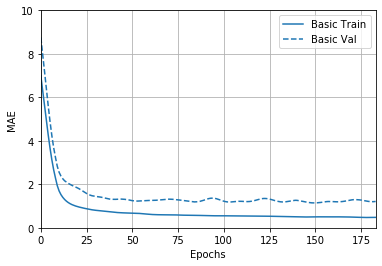

In [23]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE')

Text(0, 0.5, 'MSE')

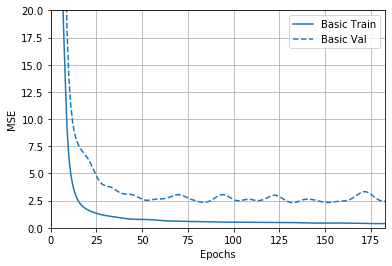

In [24]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 20])
plt.ylabel('MSE')

In [25]:
loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)
print("Loss: {}".format(loss))
print("Mean absolute error: {}".format(mae))
print("Mean squared error: {}".format(mse))

286/286 - 0s - loss: 2.9511 - mae: 1.3143 - mse: 2.9511
Loss: 2.9510602784323527
Mean absolute error: 1.3142952919006348
Mean squared error: 2.9510602951049805


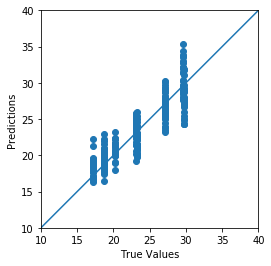

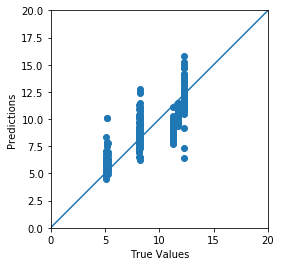

In [26]:
y_pred = model.predict(X_test).flatten().reshape((-1, 2))

a = plt.axes(aspect='equal')
plt.scatter(y_test.iloc[:, 0], y_pred[:, 0])
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [10, 40]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

plt.figure()
a = plt.axes(aspect='equal')
plt.scatter(y_test.iloc[:, 1], y_pred[:, 1])
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 20]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)